In [20]:
import os

folder_path = '/home/luisvinatea/Projects/data/csv/datasur/'

# List all CSV files in the directory
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Check if all files are detected
print(f"Detected CSV files:\n{csv_files}")


Detected CSV files:
['32207_20240924192741_report.csv', '32207_20240924193752_report.csv', '32207_20240924193534_report.csv', '32207_20240924194240_report.csv', '32207_20240924193109_report.csv', '32207_20240924191921_report.csv', '32207_20240924193337_report.csv', '32207_20240924193929_report.csv', '32207_20240924192221_report.csv', '32207_20240924193822_report.csv', '32207_20240924193706_report.csv', '32207_20240924192555_report.csv', '32207_20240924192908_report.csv', '32207_20240924193902_report.csv']


In [22]:
import pandas as pd

# Create a list to store individual dataframes
dfs = []

# Loop through each file, read it into a DataFrame, and append it to the list
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    try:
        df = pd.read_csv(file_path)
        print(f"Successfully loaded {file}")  # Confirmation message for successful loads
        dfs.append(df)
    except Exception as e:
        print(f"Error loading {file}: {e}")  # Error handling if a file can't be read

# Concatenate all dataframes into a single DataFrame
if dfs:
    combined_df = pd.concat(dfs, ignore_index=True)
    print(f"Concatenated {len(dfs)} CSV files successfully.")
else:
    print("No dataframes to concatenate.")

# Display the first few rows of the concatenated dataframe
print("Combined DataFrame:")
print(combined_df.head())


Successfully loaded 32207_20240924192741_report.csv
Successfully loaded 32207_20240924193752_report.csv
Successfully loaded 32207_20240924193534_report.csv
Successfully loaded 32207_20240924194240_report.csv
Successfully loaded 32207_20240924193109_report.csv
Successfully loaded 32207_20240924191921_report.csv
Successfully loaded 32207_20240924193337_report.csv
Successfully loaded 32207_20240924193929_report.csv
Successfully loaded 32207_20240924192221_report.csv
Successfully loaded 32207_20240924193822_report.csv
Successfully loaded 32207_20240924193706_report.csv
Successfully loaded 32207_20240924192555_report.csv
Successfully loaded 32207_20240924192908_report.csv
Successfully loaded 32207_20240924193902_report.csv
Concatenated 14 CSV files successfully.
Combined DataFrame:
    DIA  MES     AÑO       REGIMEN ADUANERO              REFRENDO        DAU  \
0   2.0    2  2021.0  IMPORTACION A CONSUMO  028-2021-10-00090052      214.0   
1   5.0    2  2021.0  IMPORTACION A CONSUMO  028-202

In [31]:
# Ensure 'FECHA' is processed correctly (this step might be redundant if already done)
combined_df['DIA'] = combined_df['DIA'].fillna(1).astype(int)
combined_df['MES'] = combined_df['MES'].fillna(1).astype(int)
combined_df['AÑO'] = combined_df['AÑO'].fillna(2000).astype(int)

# Combine 'DIA', 'MES', and 'AÑO' into a proper date
combined_df['FECHA_STR'] = combined_df['AÑO'].astype(str) + '-' + combined_df['MES'].astype(str) + '-' + combined_df['DIA'].astype(str)
combined_df['FECHA'] = pd.to_datetime(combined_df['FECHA_STR'], errors='coerce')

# Sort by the 'FECHA' column to have a chronological order
combined_df = combined_df.sort_values(by='FECHA')

# Inspect the first few rows to verify correctness
print(combined_df.head())

# Check for missing date rows
missing_dates = combined_df[combined_df['FECHA'].isna()]
print(f"Rows with missing dates:\n{missing_dates}")


     DIA  MES   AÑO       REGIMEN ADUANERO            REFRENDO         DAU  \
202    1    1  2000  IMPORTACION A CONSUMO  028-2012-10-004882  18254911.0   
203    1    1  2000  IMPORTACION A CONSUMO  028-2012-10-004882  18254911.0   
194    1    1  2000  IMPORTACION A CONSUMO  028-2012-10-004836  18254631.0   
195    1    1  2000  IMPORTACION A CONSUMO  028-2012-10-004836  18254631.0   
196    1    1  2000  IMPORTACION A CONSUMO  028-2012-10-004834  18254629.0   

     ITEM  RUC IMPORTADOR PROBABLE IMPORTADOR PAIS DE ORIGEN  ... PESO BRUTO  \
202   NaN    791732506001          SAMLIT C A         TAIWAN  ...    4515.99   
203   NaN    791732506001          SAMLIT C A         TAIWAN  ...     112.01   
194   NaN    791734797001  CORPIECAM CIA LTDA         TAIWAN  ...    3387.02   
195   NaN    791734797001  CORPIECAM CIA LTDA         TAIWAN  ...      83.98   
196   NaN    791737559001       NUTRIFEED S A         TAIWAN  ...    1467.69   

    VERIFICADOR PAíS DE ORIGEN DESCRIPCIóN ARANCEL

In [33]:
# Filter out rows where the date is '2000-01-01' as it indicates missing or invalid date data
valid_dates_df = combined_df[combined_df['FECHA'] != '2000-01-01']

# Check the remaining date range
print(f"Valid date range: {valid_dates_df['FECHA'].min()} to {valid_dates_df['FECHA'].max()}")


# Filter out rows where the year is 2000 (indicating invalid or default date values)
valid_dates_df = valid_dates_df[valid_dates_df['FECHA'].dt.year != 2000]

# Check the new valid date range
print(f"Filtered valid date range: {valid_dates_df['FECHA'].min()} to {valid_dates_df['FECHA'].max()}")


Valid date range: 2000-02-01 00:00:00 to 2024-09-13 00:00:00
Filtered valid date range: 2013-02-15 00:00:00 to 2024-09-13 00:00:00


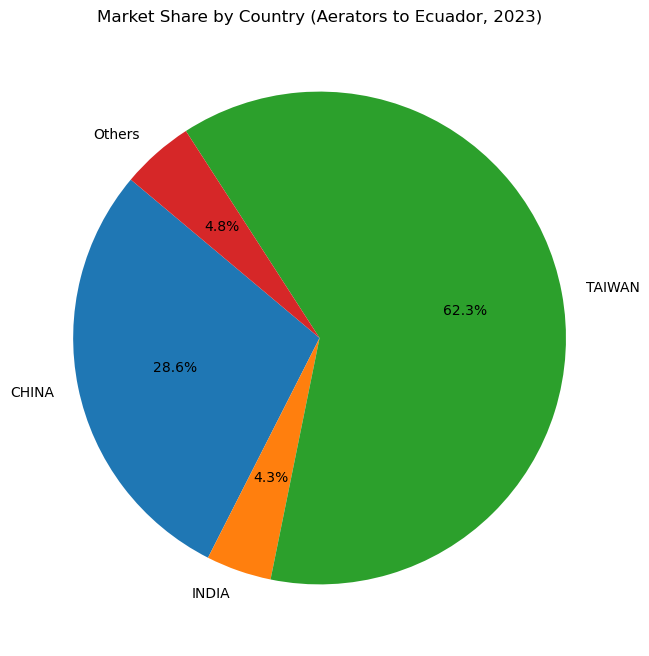

In [67]:
# Calculate total expenditure by country
total_expenditure_by_country = valid_dates_df.groupby('PAIS DE ORIGEN')['US$ CIF'].sum().sort_values(ascending=False)

# Reset index to avoid issues with adding new rows
large_countries_2023 = large_countries_2023.reset_index(drop=True)

# Ensure only necessary columns are retained
large_countries_2023 = large_countries_2023[['PAIS DE ORIGEN', 'US$ CIF', 'percentage']].copy()

# Combine small countries into 'Others' if they exist
if not small_countries_2023.empty:
    others_sum = small_countries_2023['US$ CIF'].sum()
    others_percentage = others_sum / country_expenditure_2023['US$ CIF'].sum()

    # Check if 'Others' already exists in the DataFrame
    if 'Others' in large_countries_2023['PAIS DE ORIGEN'].values:
        # Update the 'Others' row if it already exists
        large_countries_2023.loc[large_countries_2023['PAIS DE ORIGEN'] == 'Others', 'US$ CIF'] += others_sum
        large_countries_2023.loc[large_countries_2023['PAIS DE ORIGEN'] == 'Others', 'percentage'] += others_percentage
    else:
        # If 'Others' doesn't exist, append a new row for 'Others'
        others_row = pd.DataFrame({'PAIS DE ORIGEN': ['Others'], 'US$ CIF': [others_sum], 'percentage': [others_percentage]})
        large_countries_2023 = pd.concat([large_countries_2023, others_row], ignore_index=True)

# Drop any possible duplicate 'Others' rows that may have been created earlier
large_countries_2023 = large_countries_2023.drop_duplicates(subset='PAIS DE ORIGEN', keep='first')

# Plot the pie chart for 2023 with uncluttered labels
plt.figure(figsize=(8, 8))
plt.pie(large_countries_2023['US$ CIF'], labels=large_countries_2023['PAIS DE ORIGEN'], autopct='%1.1f%%', startangle=140)
plt.title('Market Share by Country (Aerators to Ecuador, 2023)')
plt.show()

In [74]:
# Define the columns of interest
columns_of_interest = [
    'AGENCIA DE CARGA', 'RUC IMPORTADOR', 'PROBABLE IMPORTADOR', 'VIA DE TRANSPORTE',
    'ADUANA', 'MARCA COMERCIAL', 'AñO FABRICACIóN', 'AGENCIA DE TRANSPORTE'
]

# Filter the DataFrame to only include rows where all of the columns of interest have valid (non-null) data
valid_data_df = valid_dates_df.dropna(subset=columns_of_interest)

# Now get the most frequent values in the filtered DataFrame
frequent_values = {}

# Loop through the columns and get the most frequent values and their counts
for column in columns_of_interest:
    # Ensure the column exists in the DataFrame
    if column in valid_data_df.columns:
        value_counts = valid_data_df[column].value_counts().head(10)  # Get top 10 most frequent values
        frequent_values[column] = value_counts

# Combine all value counts into a single DataFrame
frequent_values_df = pd.DataFrame(frequent_values)

# Display the result
print("Most Frequent Values in Columns of Interest After Cleaning:")
print(frequent_values_df)


Most Frequent Values in Columns of Interest After Cleaning:
                                                    AGENCIA DE CARGA  \
0.0                                                              NaN   
1790298817001                                                    NaN   
190122271001                                                     NaN   
2017.0                                                           NaN   
2018.0                                                           NaN   
2019.0                                                           NaN   
2020.0                                                           NaN   
2021.0                                                           NaN   
2022.0                                                           NaN   
2023.0                                                           NaN   
2024.0                                                           NaN   
791724260001                                                     NaN   
9240

In [76]:
# Get top 3 most frequent values in each column of interest after dropping NaN
frequent_values_cleaned_top3 = {}
for column in columns_of_interest:
    if column in valid_data_df_cleaned.columns:
        value_counts = valid_data_df_cleaned[column].value_counts().head(3)  # Get top 3
        frequent_values_cleaned_top3[column] = value_counts

# Combine the value counts into a single DataFrame
frequent_values_cleaned_top3_df = pd.DataFrame(frequent_values_cleaned_top3)

# Display the result
print("Top 3 Most Frequent Values in Columns of Interest After Dropping NaN:")
print(frequent_values_cleaned_top3_df)


Top 3 Most Frequent Values in Columns of Interest After Dropping NaN:
                                               AGENCIA DE CARGA  \
0.0                                                         NaN   
2021.0                                                      NaN   
791724260001                                                NaN   
992597143001                                                NaN   
993069337001                                                NaN   
AEREA                                                       NaN   
COSUMISA S.A.                                               NaN   
CRUSTACEOS & PECES DE SUD AMERICA S A CRUPESA               NaN   
FARLETZA S.A.                                              59.0   
GLOVAL-SHIPPING ECUADOR CIA.LTDA                           24.0   
GREENANDES ECUADOR S.A.                                     NaN   
GUAYAQUIL AEREO                                             NaN   
GUAYAQUIL MARITIMO                                         


| **Column**                 | **Top 1 Value**             | **Count** | **Top 2 Value**             | **Count** | **Top 3 Value**             | **Count** |
|----------------------------|-----------------------------|-----------|-----------------------------|-----------|-----------------------------|-----------|
| **AGENCIA DE CARGA**        | FARLETZA S.A.               | 59        | GLOVAL-SHIPPING ECUADOR CIA  | 24        | nan                         | 64        |
| **RUC IMPORTADOR**          | 791724260001                | 71        | 992597143001                 | 37        | 993069337001                | 23        |
| **PROBABLE IMPORTADOR**     | CRUSTACEOS & PECES DE SUD   | 71        | COSUMISA S.A.                | 37        | TECNIFICACIONES ACUICOLAS    | 23        |
| **VIA DE TRANSPORTE**       | AEREA                       | 43        | MARITIMO                     | 311       | GUAYAQUIL AEREO              | 24        |
| **ADUANA**                  | GUAYAQUIL MARITIMO          | 310       | MARITIMO                     | 311       | QUITO                       | 19        |
| **MARCA COMERCIAL**         | SIN MARCA                   | 132       | SM                           | 51        | nan                         | 69        |
| **AÑO FABRICACIÓN**         | 0.0                         | 101       | 2021.0                       | 51        | nan                         | 54        |
| **AGENCIA DE TRANSPORTE**   | nan                         | 344       | HAMBURG SÜD ECUADOR S.A.     | 2         | GREENANDES ECUADOR S.A.      | 6         |


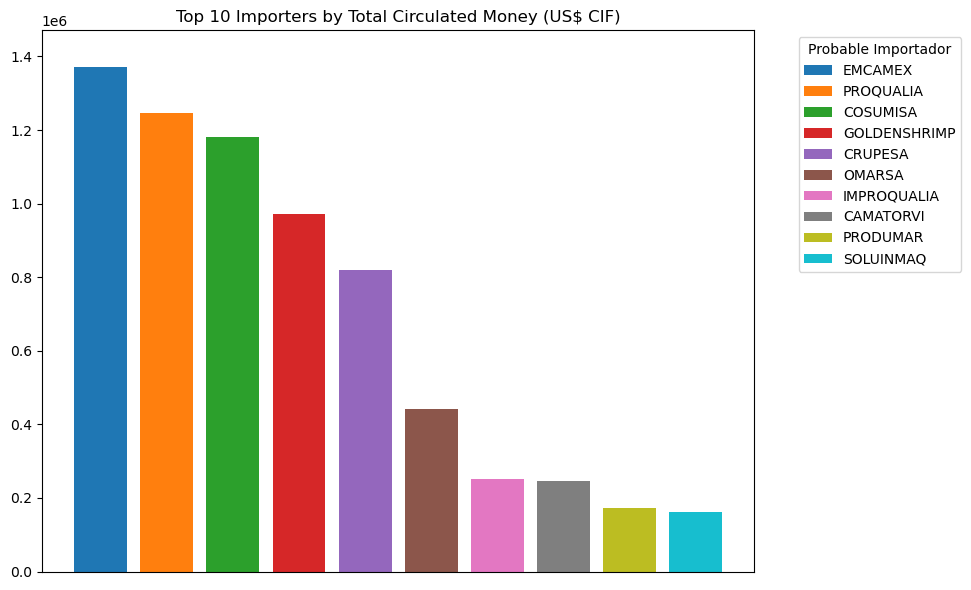

In [83]:
import numpy as np
import numpy as np

# Shortened company names for clarity in the legend
shortened_names = [
    'EMCAMEX', 'PROQUALIA', 'COSUMISA', 'GOLDENSHRIMP', 
    'CRUPESA', 'OMARSA', 'IMPROQUALIA', 'CAMATORVI', 
    'PRODUMAR', 'SOLUINMAQ'
]

# Get the colormap 'tab10' without specifying the number of colors
colors = plt.get_cmap('tab10')

# Adjust y-axis range for more vertical spread
y_max = top_10_importers.max() + 100000  # Adding some buffer for readability

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(np.arange(len(top_10_importers)), top_10_importers.values, color=colors(np.arange(10)))

# Removing x-tick labels and adding a custom legend
plt.xticks([])
plt.ylim(0, y_max)
plt.title('Top 10 Importers by Total Circulated Money (US$ CIF)')
plt.ylabel('')

# Adding a legend
plt.legend(bars, shortened_names, title="Probable Importador", loc="upper right", bbox_to_anchor=(1.30, 1))

# Show the plot
plt.tight_layout()
plt.show()